In [1]:
import skimage.io
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [10]:
plt.rcParams['figure.figsize'] = (12,12)

In [3]:
pred = skimage.io.imread("../outputs/prediction/png/dice_70_50/A23_slice007_frame011-mask.png")
truth = skimage.io.imread("../inputs/cmr-cine-sscrofa/data/png/masks/obs0_rep0/A23_slice007_frame011-mask.png")
img = skimage.io.imread("../inputs/cmr-cine-sscrofa/data/png/images/A23_slice007_frame011-image.png")

In [4]:
default_cmap = plt.cm.viridis(np.arange(plt.cm.viridis.N))
default_cmap[0][-1] = 0
default_cmap = ListedColormap(default_cmap)

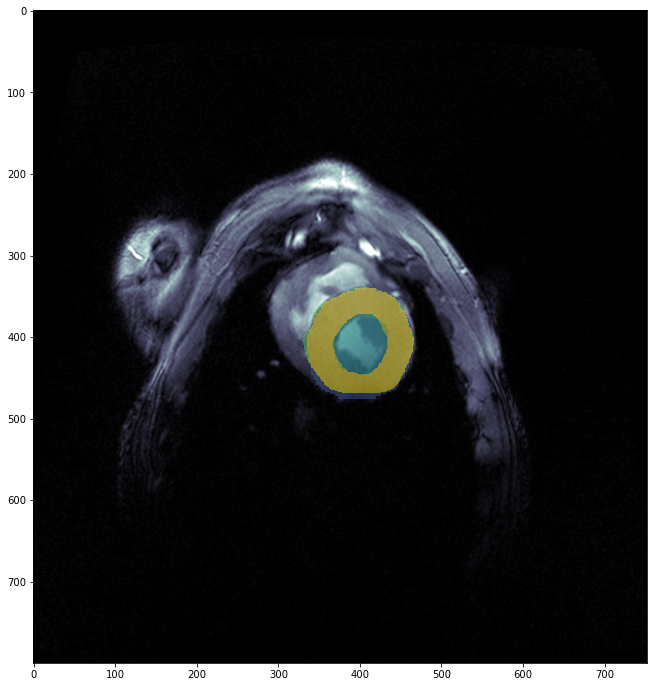

In [11]:
plt.imshow(img, cmap="bone")
plt.imshow((pred+truth*3), interpolation="nearest", alpha=.5, cmap=default_cmap)
#plt.imshow((pred+truth*3)[300:500,300:500], interpolation="nearest", alpha=.5)
#plt.imshow(truth, interpolation="nearest", alpha=.5, cmap="inferno")

In [12]:
def diff_image(pat, sl, fr=11):
    pred = skimage.io.imread(f"../outputs/prediction/png/dice_70_50/{pat}_slice{sl:03}_frame{fr:03}-mask.png")
    truth = skimage.io.imread(f"../inputs/cmr-cine-sscrofa/data/png/masks/obs0_rep0/{pat}_slice{sl:03}_frame{fr:03}-mask.png")
    img = skimage.io.imread(f"../inputs/cmr-cine-sscrofa/data/png/images/{pat}_slice{sl:03}_frame{fr:03}-image.png")
    plt.imshow(img, cmap="bone")
    plt.imshow((pred+truth*3), interpolation="nearest", alpha=.5, cmap=default_cmap)
    #plt.imshow(np.abs(pred-truth), interpolation="nearest", alpha=.5, cmap=default_cmap)
    plt.axis("off")

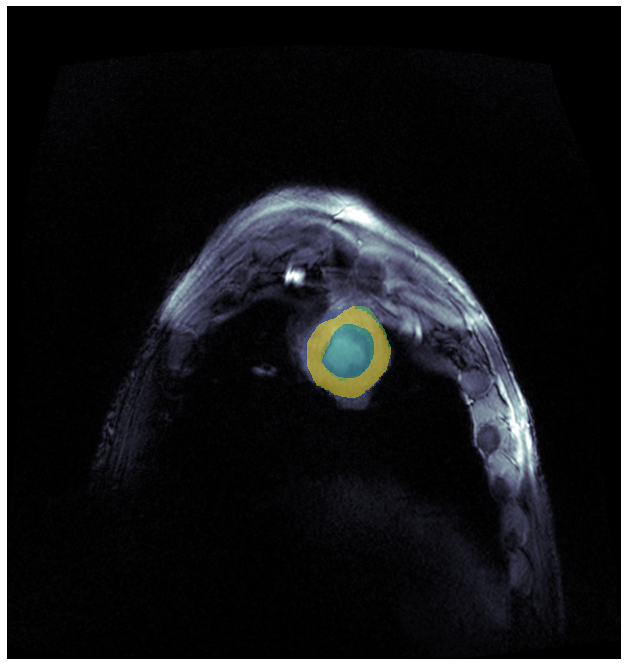

In [13]:
diff_image("A27",2,11)

In [14]:
def diff_image_row(pat, sl, fr=11):
    pred = skimage.io.imread(f"../outputs/prediction/png/dice_70_50/{pat}_slice{sl:03}_frame{fr:03}-mask.png")
    truth = skimage.io.imread(f"../inputs/cmr-cine-sscrofa/data/png/masks/obs0_rep0/{pat}_slice{sl:03}_frame{fr:03}-mask.png")
    img = skimage.io.imread(f"../inputs/cmr-cine-sscrofa/data/png/images/{pat}_slice{sl:03}_frame{fr:03}-image.png")
    fig, axs = plt.subplots(1,3, figsize=(15,5))
    axs[0].imshow(img, cmap="bone")
    axs[0].set_title("DL")
    axs[0].imshow(pred, interpolation="nearest", alpha=.5, cmap=default_cmap)
    axs[0].axis("off")
    axs[1].imshow(img, cmap="bone")
    axs[1].axis("off")
    axs[1].set_title("observer 1")
    axs[1].imshow(truth, interpolation="nearest", alpha=.5, cmap=default_cmap)
    axs[2].imshow(img, cmap="bone")
    axs[2].axis("off")
    axs[2].set_title("difference")
    axs[2].imshow(pred!=truth, interpolation="nearest", alpha=.5, cmap=default_cmap)
    return pred,truth

In [23]:
def diff_image(pat, sl, fr=11):
    pred = skimage.io.imread(f"../outputs/prediction/png/dice_70_50/{pat}_slice{sl:03}_frame{fr:03}-mask.png")
    truth = skimage.io.imread(f"../inputs/cmr-cine-sscrofa/data/png/masks/obs0_rep0/{pat}_slice{sl:03}_frame{fr:03}-mask.png")
    img = skimage.io.imread(f"../inputs/cmr-cine-sscrofa/data/png/images/{pat}_slice{sl:03}_frame{fr:03}-image.png")
    img = skimage.color.gray2rgb(img)
    img[pred!=truth] = [255,255,0]
    return img

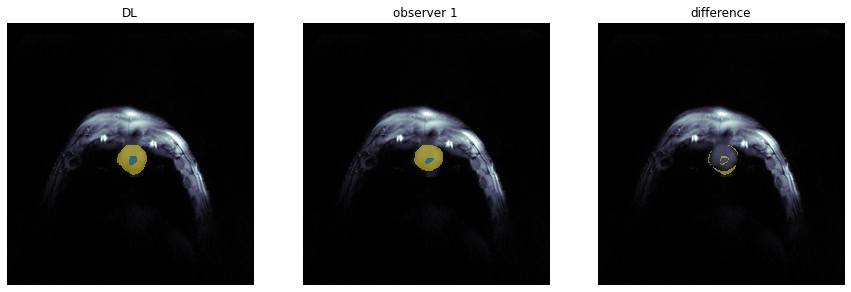

In [26]:
pred, truth = diff_image_row("A23",1,11)

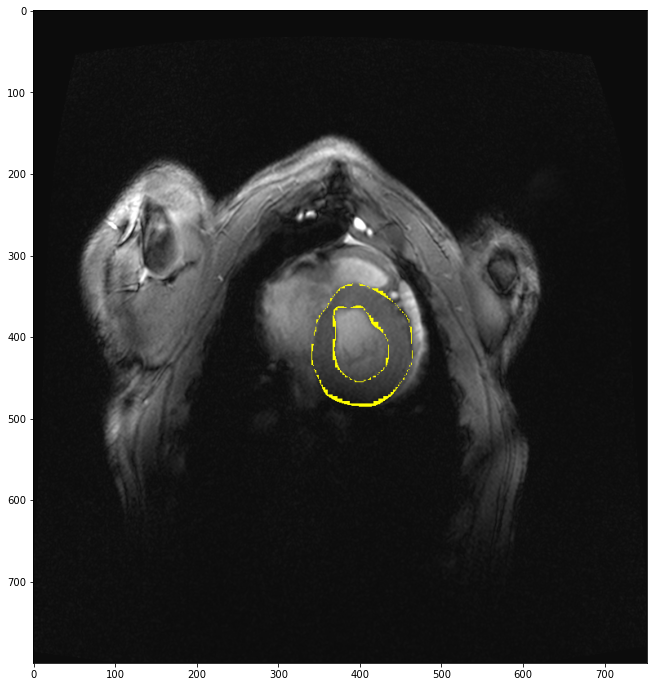

In [34]:
plt.imshow(diff_image("A23",10,11))

In [35]:
for s in [2,7,11]:
    di = diff_image("A23",s-1,11) # 0 indexing
    skimage.io.imsave(f"../outputs/prediction/diff_images/A23_s{s:02}_es.png", di)
for s in [2,7,12]:
    di = diff_image("A27",s-1,11) # 0 indexing
    skimage.io.imsave(f"../outputs/prediction/diff_images/A27_s{s:02}_es.png", di)

A23 Schicht 2, 7 und 11 und A27 Schicht 2, 7 und 12 (jeweils nur End-Systole).

In [18]:
(pred==1).sum(),(truth==1).sum(),((pred == 1) & (truth == 1)).sum()

(3848, 3500, 3421)

In [19]:
(pred==2).sum(),(truth==2).sum(),((pred == 2) & (truth == 2)).sum()

(10433, 11093, 10095)

In [20]:
2*3421/(3848+3500)

0.9311377245508982

In [21]:
2*10095/(10433+11093)

0.9379355198364768